### Численное решение уравнения переноса

In [339]:
# Импортируем модули для расчётов
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [340]:
L = m.pi # x = [0,pi] - длина области, в которой решается задача
C1 = 1.0 # lambda1
C2 = -1.0 #lambda2
Co = 0.7 # число Куранта
T = 0.9 # решаем в треугольнике. Значение T не превышает pi/2.
M = 101 # количество узлов вдоль оси
x = np.linspace(0, m.pi, M)
h = L / (M-1) # шаг по координате, h
dt = Co * h / abs(C1) # коэффициент должен быть меньше единицы
u_init0 = [] # задаём начальные условия
v_init0 = []
for el in x:
    u_init0.append(m.sin(el))
    v_init0.append(m.cos(el)) 
u_init = np.array(u_init0)
v_init = np.array(v_init0)
w1_init = u_init + v_init # компоненты вектора w
w2_init = - u_init + v_init

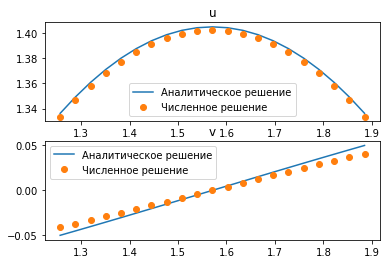

In [341]:
def Transport (w0, C): #здесь решается уравнение переноса сеточно-характеристическим методом
    w_next = np.zeros(M)
    w_curr = w0 # начальное ненулевое значение 
    for k in range(int(T / dt)):
        for i in range(k+1, M-k-1):
            w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[i-1])/h + (C-abs(C))/2*(w_curr[i+1]-w_curr[i])/h)
        for i in range(M):
            w_curr[i] = w_next[i]
    return(w_curr)

x_m = np.linspace(0,L,M) #для построения графика
w1 = Transport(w1_init, C1)
w2 = Transport(w2_init, C2)
u = (w1 - w2) / 2 #возвращаемся к компонетам вектора q
v = (w1 + w2) / 2
fig, ax = plt.subplots(2,1)
a=int(T/dt) # Решаем в треугольнике. Чем больше T, тем меньше отрезок по оси х, на котором можем получить численное решение
b=M-int(T/dt)
ax[0].plot(x_m[a:b], (m.cos(T)+m.sin(T))*u_init[a:b], '-', label="Аналитическое решение")
ax[1].plot(x_m[a:b], (m.cos(T)-m.sin(T))*v_init[a:b], '-', label="Аналитическое решение")
ax[0].plot(x_m[a:b], u[a:b], 'o', label="Численное решение")
ax[1].plot(x_m[a:b], v[a:b], 'o', label="Численное решение")
ax[0].set_title("u")
ax[1].set_title("v")
for _ in ax:
    _.legend()
plt.show()

In [342]:
L = m.pi # x = [0,pi] - длина области, в которой решается задача
C1 = 1.0 # lambda1
C2 = -1.0 #lambda2
Co = 0.7 # число Куранта
T = 0.5 # решаем в треугольнике. Значение T не превышает pi/2.
M = 101 # количество узлов вдоль оси
x = np.linspace(0, m.pi, M)
h = L / (M-1) # шаг по координате, h
dt = Co * h / abs(C1) # коэффициент должен быть меньше единицы
u_init0 = [] # задаём начальные условия
v_init0 = []
for el in x:
    u_init0.append(m.sin(el))
    v_init0.append(m.cos(el)) 
u_init = np.array(u_init0)
v_init = np.array(v_init0)
w1_init = u_init + v_init # компоненты вектора w
w2_init = - u_init + v_init

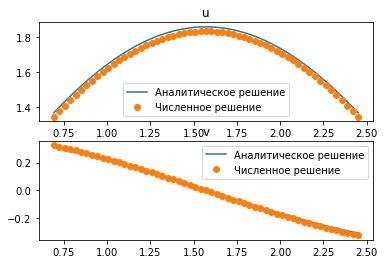

In [343]:
def Transport21 (w0, C): #здесь решается уравнение переноса сеточно-характеристическим методом
    w_next = np.zeros(M)
    w_curr = w0 # начальное ненулевое значение 
    for k in range(int(T / dt)):
        for i in range(k+1, M-k-1):
            w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[i-1])/h + (C-abs(C))/2*(w_curr[i+1]-w_curr[i])/h)+dt
        for i in range(M):
            w_curr[i] = w_next[i]
    return(w_curr)

def Transport22 (w0, C): #здесь решается уравнение переноса сеточно-характеристическим методом
    w_next = np.zeros(M)
    w_curr = w0 # начальное ненулевое значение 
    for k in range(int(T / dt)):
        for i in range(k+1, M-k-1):
            w_next[i] = w_curr[i] - dt * ((C+abs(C))/2*(w_curr[i]-w_curr[i-1])/h + (C-abs(C))/2*(w_curr[i+1]-w_curr[i])/h)-dt
        for i in range(M):
            w_curr[i] = w_next[i]
    return(w_curr)
x_m = np.linspace(0,L,M) #для построения графика
w1 = Transport21(w1_init, C1)
w2 = Transport22(w2_init, C2)
u = (w1 - w2) / 2 #возвращаемся к компонетам вектора q
v = (w1 + w2) / 2
fig, ax = plt.subplots(2,1)
a=int(T/dt)
b=M-int(T/dt)
ax[0].plot(x_m[a:b], (m.cos(T)+m.sin(T))*u_init[a:b] + T*np.ones(M-2*int(T/dt)), '-', label="Аналитическое решение")
ax[1].plot(x_m[a:b], (m.cos(T)-m.sin(T))*v_init[a:b], '-', label="Аналитическое решение")
ax[0].plot(x_m[a:b], u[a:b], 'o', label="Численное решение")
ax[1].plot(x_m[a:b], v[a:b], 'o', label="Численное решение")
ax[0].set_title("u")
ax[1].set_title("v")
for _ in ax:
    _.legend()
plt.show()